## Loading the Data

In [2]:
import yfinance as yf
import pandas as pd

df = yf.download('TSLA', start='2019-01-01', end='2024-12-31')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2019-01-02,20.674667,20.674667,21.008667,19.920000,20.406668,174879000
2019-01-03,20.024000,20.024000,20.626667,19.825333,20.466667,104478000
2019-01-04,21.179333,21.179333,21.200001,20.181999,20.400000,110911500
2019-01-07,22.330667,22.330667,22.449333,21.183332,21.448000,113268000
2019-01-08,22.356667,22.356667,22.934000,21.801332,22.797333,105127500


In [4]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-12-23,430.600006,430.600006,434.510010,415.410004,431.000000,72698100
2024-12-24,462.279999,462.279999,462.779999,435.140015,435.899994,59551800
2024-12-26,454.130005,454.130005,465.329987,451.019989,465.160004,76366400
2024-12-27,431.660004,431.660004,450.000000,426.500000,449.519989,82666800
2024-12-30,417.410004,417.410004,427.000000,415.750000,419.399994,64941000


In [5]:
df.columns

MultiIndex([('Adj Close', 'TSLA'),
            (    'Close', 'TSLA'),
            (     'High', 'TSLA'),
            (      'Low', 'TSLA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [6]:
df1 = df['Adj Close']

In [7]:
df1.head()

Ticker,TSLA
Date,
2019-01-02,20.674667
2019-01-03,20.024000
2019-01-04,21.179333
2019-01-07,22.330667
2019-01-08,22.356667


In [8]:
df1.columns = ['Adj Close']

In [9]:
df1.head()

,Adj Close
Date,
2019-01-02,20.674667
2019-01-03,20.024000
2019-01-04,21.179333
2019-01-07,22.330667
2019-01-08,22.356667


In [10]:
df1.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1509, freq=None)

In [11]:
df1['Adj Close']

Date
2019-01-02     20.674667
2019-01-03     20.024000
2019-01-04     21.179333
2019-01-07     22.330667
2019-01-08     22.356667
                 ...    
2024-12-23    430.600006
2024-12-24    462.279999
2024-12-26    454.130005
2024-12-27    431.660004
2024-12-30    417.410004
Name: Adj Close, Length: 1509, dtype: float64

In [12]:
df1.shape

(1509, 1)

## Exploratory Data Analysis

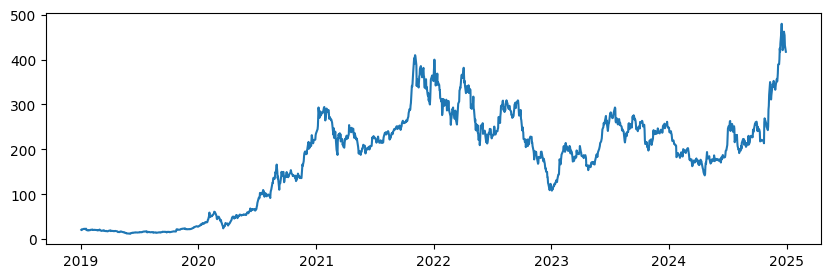

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.plot(df1)

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.01868519]
 [0.01729466]
 [0.0197637 ]
 ...
 [0.94501303]
 [0.89699288]
 [0.86653952]]


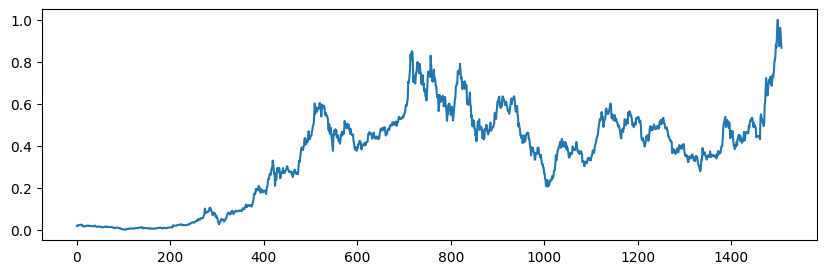

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.plot(df1)

## Splitting Data into Train and Test

In [17]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(980, 529)

In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(879, 100)
(879,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(428, 100)
(428,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Model Building and Evaluation

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 605,105 (2.31 MB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 403,404 (1.54 MB)

In [27]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0589
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0078
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0025
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0023
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0020
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0018
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0017
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0019
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0021
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0019
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0017
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - lo

In [48]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [66]:
# ##Transformback to original form
Original_train_predict=scaler.inverse_transform(train_predict)
Original_test_predict=scaler.inverse_transform(test_predict)

In [80]:
ytr = y_train.copy()
ytr = ytr.reshape(-1,1)
yts = ytest.copy()
yts = yts.reshape(-1,1)

In [81]:
Original_y_train=scaler.inverse_transform(ytr)
Original_y_test=scaler.inverse_transform(yts)

In [82]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Original_y_train,Original_train_predict))

8.85980736401738

In [84]:
### Test Data RMSE
math.sqrt(mean_squared_error(Original_y_test,Original_test_predict))

9.916794526635748

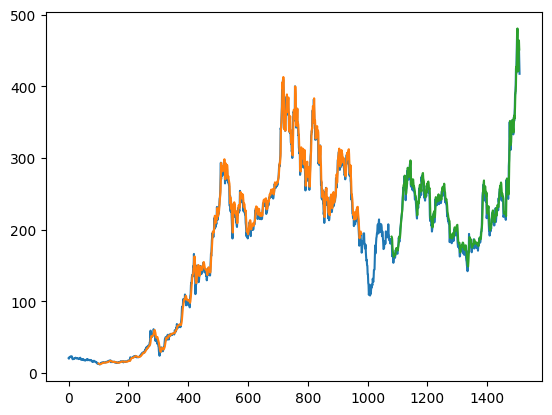

In [85]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(Original_train_predict)+look_back, :] = Original_train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(Original_train_predict)+(look_back*2)+1:len(df1)-1, :] = Original_test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Predicting the future

In [33]:
len(test_data)

529

In [34]:
# We will use past 100 days data to predict future price
past_data = test_data[429:].copy().tolist()
past_data = [i[0] for i in past_data]
past_data

[0.39943838156928435,
 0.4019173998026388,
 0.39655334591960967,
 0.41865072396394926,
 0.40486657779091295,
 0.43213568053014767,
 0.43636708571520344,
 0.4504718131443512,
 0.44700975732105297,
 0.4516472125316504,
 0.4246986584393057,
 0.44534283913878187,
 0.43014821370098655,
 0.4215999019522234,
 0.4142055979414858,
 0.41533824663945923,
 0.4320715708007697,
 0.42457043898054975,
 0.4433980903897251,
 0.46639303725457826,
 0.4248482369381139,
 0.4366876669713149,
 0.4578447255058151,
 0.4620334126107665,
 0.4656236878928207,
 0.4666494761720903,
 0.45914834435187035,
 0.46147775147719516,
 0.4600459131723839,
 0.4957778588909516,
 0.4836606309001864,
 0.5087712966621781,
 0.5178966285845649,
 0.523773560302618,
 0.517789768165861,
 0.5311251136240298,
 0.5336255235066579,
 0.5259106382398089,
 0.5066769694143132,
 0.48881099655502935,
 0.50894226681026,
 0.48917429589124517,
 0.49701736800762886,
 0.4896444556461649,
 0.4847719205581076,
 0.4399573936064791,
 0.4428638209054274,


In [35]:
# l = past 100 days stock price
#days = number of days you want to predict
def prediction(l,days):
    new = l.copy()
    pl = []
    d=0
    while(d<days):
        pred = model.predict(np.array(new[d:]).reshape(1,100,1))
        new.extend(pred[0])
        pl.extend(pred[0])
        d+=1
    return np.array(pl).reshape(-1,1)
# gives an array of price for next n days 

In [36]:
c = prediction(past_data,30)
c

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

array([[0.8623819 ],
       [0.8649876 ],
       [0.8673516 ],
       [0.86847407],
       [0.8695522 ],
       [0.8710323 ],
       [0.8730231 ],
       [0.8753553 ],
       [0.8777463 ],
       [0.87994474],
       [0.8817869 ],
       [0.8831962 ],
       [0.88416344],
       [0.8847241 ],
       [0.88494015],
       [0.8848867 ],
       [0.8846427 ],
       [0.8842835 ],
       [0.883876  ],
       [0.883475  ],
       [0.88312143],
       [0.88284236],
       [0.8826521 ],
       [0.88255423],
       [0.8825437 ],
       [0.8826095 ],
       [0.88273734],
       [0.88291097],
       [0.8831145 ],
       [0.8833335 ]], dtype=float32)

## Visualising the predicted data

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
len(df1)

1509

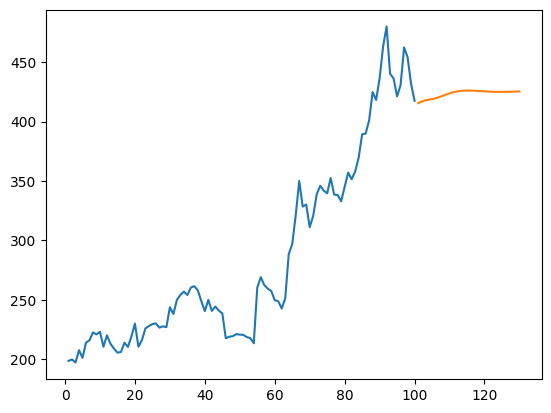

In [86]:
plt.plot(day_new,scaler.inverse_transform(df1[1409:]))
plt.plot(day_pred,scaler.inverse_transform(c))

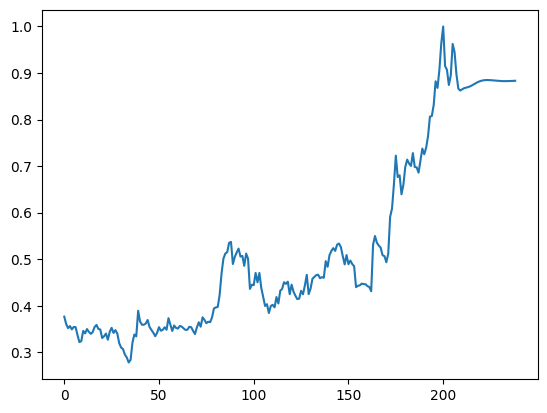

In [40]:
df3=df1.tolist()
df3.extend(c)
plt.plot(df3[1300:])

In [41]:
df3=scaler.inverse_transform(df3).tolist()

<Axes: >

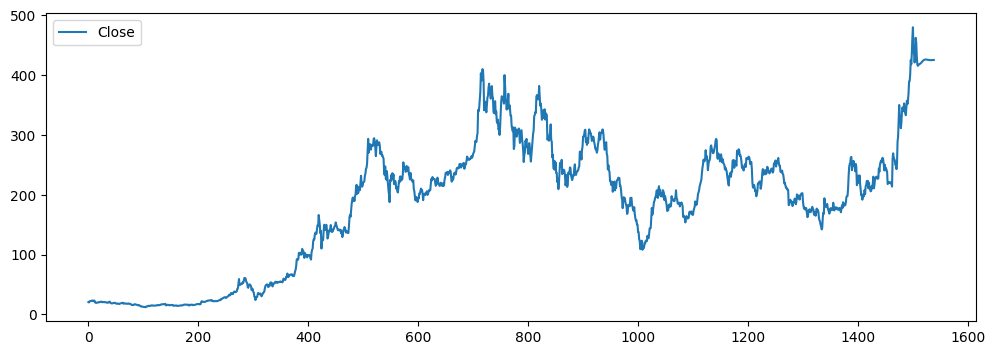

In [42]:
df4 = pd.DataFrame(df3,columns = ['Close'])
df4.plot(figsize = (12,4))

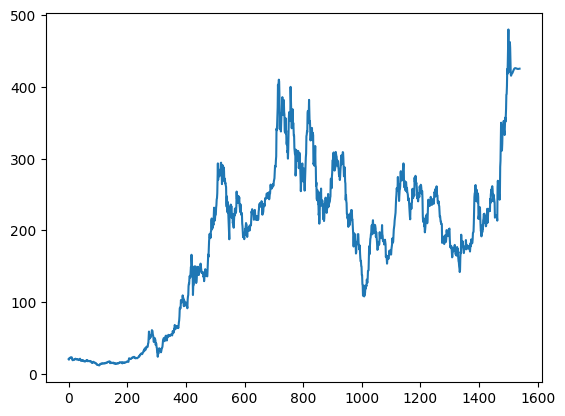

In [43]:
plt.plot(df3)